In [6]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [7]:
DATA_PATH = "/home/ubuntu/musikalkemist/test.json"

In [3]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, y



Data succesfully loaded!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          

Epoch 48/100
219/219 [==============================] - 2s 9ms/step - loss: 1.8845 - accuracy: 0.5500 - val_loss: 2.0398 - val_accuracy: 0.5248
Epoch 49/100
219/219 [==============================] - 2s 7ms/step - loss: 1.8383 - accuracy: 0.5660 - val_loss: 2.0119 - val_accuracy: 0.5155
Epoch 50/100
219/219 [==============================] - 2s 8ms/step - loss: 1.8055 - accuracy: 0.5647 - val_loss: 2.0109 - val_accuracy: 0.5218
Epoch 51/100
219/219 [==============================] - 2s 8ms/step - loss: 1.7959 - accuracy: 0.5768 - val_loss: 1.9910 - val_accuracy: 0.5215
Epoch 52/100
219/219 [==============================] - 2s 7ms/step - loss: 1.7757 - accuracy: 0.5710 - val_loss: 1.9461 - val_accuracy: 0.5385
Epoch 53/100
219/219 [==============================] - 2s 9ms/step - loss: 1.7117 - accuracy: 0.5906 - val_loss: 1.9405 - val_accuracy: 0.5348
Epoch 54/100
219/219 [==============================] - 2s 9ms/step - loss: 1.6818 - accuracy: 0.5967 - val_loss: 1.9281 - val_accuracy:

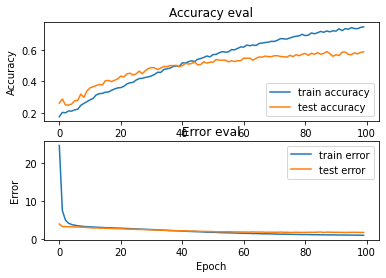

In [9]:
if __name__ == "__main__":

    # load data
    X, y = load_data(DATA_PATH)

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # build network topology
    model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

    # plot accuracy and error as a function of the epochs
    plot_history(history)




